In [57]:
from oneargopy.OneArgo import Argo
from argopy import DataFetcher as ArgoDataFetcher
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cmocean
import matplotlib.colors as mcolors
import matplotlib.dates as mdates

In [2]:
argo = Argo('argo_config.json')

Starting initialize process...
Your current download settings are: 
[DownloadSettings] -> 
Base Directory: ., 
Subdirectories: ['Index', 'Meta', 'Tech', 'Traj', 'Profiles'], 
Index Files: ['ar_index_global_traj.txt', 'ar_index_global_tech.txt', 'ar_index_global_meta.txt', 'ar_index_global_prof.txt', 'argo_synthetic-profile_index.txt'], 
Verbose Setting: True, 
Max Attempts: 5, 
Keep Index In Memory: True, 
Float Type: bgc

Your current source settings are: 
[Source Settings] -> 
Hosts: ['https://data-argo.ifremer.fr/', 'https://usgodae.org/ftp/outgoing/argo/'], 
Available Variables: None, 
Data Assimilation Centers: None

Checking for subdirectories...
The Index directory already exists
The Meta directory already exists
The Tech directory already exists
The Traj directory already exists
The Profiles directory already exists

ar_index_global_traj.txt does not need to be updated yet.
ar_index_global_tech.txt does not need to be updated yet.
ar_index_global_meta.txt does not need to be up

/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:611: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  values='data_type').fillna(0).infer_objects(copy=False).astype('int8')


Filling in source settings information...
Marking Parameters with their data mode...
Filling in source settings information...
Marking bgc floats in prof_index dataframe...
Creating float_stats dataframe...

19964 floats with 3290785 profiles found.
2755 BGC floats with 378785 profiles found.
Initialization is finished




In [16]:
pressure = argo.select_profiles(lon_lim=[150,180], lat_lim=[-68,-58], start_date='2022-01-01', end_date='2022-12-31')

Starting select_profiles...
Validating parameters...
Validating longitude and latitude limits...
Validating start and end dates...
Validating 'type' keyword argument...
Preparing float data for filtering...


/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:769: UserWarning: no explicit representation of timezones available for np.datetime64
  self.start_date = np.datetime64(self.start_date)
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:770: UserWarning: no explicit representation of timezones available for np.datetime64
  self.end_date = np.datetime64(self.end_date)


Filtering through 19964 floats
There are 3266144 profiles associated with these floats

Sorting floats for those within the geographic range...
Creating point list from profiles...
Creating polygon...
74 floats fall within the geographic range
2441 profiles associated with those floats
Sorting floats for those within the date range...
728 floats fall within the date range
25238 profiles associated with those floats
Applying outside=None constraints...
5 floats selected
69 profiles selected according to time and space constraints
Floats Selected: dict_keys([5905097, 5905102, 5905379, 5905638, 5906624])



/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:1074: UserWarning: no explicit representation of timezones available for np.datetime64
  beginning_of_full_range = np.datetime64(datetime(1995, 1, 1, tzinfo=timezone.utc))
/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:1075: UserWarning: no explicit representation of timezones available for np.datetime64
  end_of_full_range = np.datetime64(datetime.now(timezone.utc))


In [18]:
pdf = argo.load_float_data(pressure, variables=['DOXY','TEMP','PSAL','CHLA', 'BBP700','NITRATE','PH_IN_SITU_TOTAL'])

Validating passed floats...
Validating passed 'variables'...
5905097_Sprof.nc does not need to be updated yet.
5905102_Sprof.nc does not need to be updated yet.
5905379_Sprof.nc does not need to be updated yet.
5905638_Sprof.nc does not need to be updated yet.
5906624_Sprof.nc does not need to be updated yet.
Loading float data...
Loading Float data from float 5905097 with 14 profiles...
Dropping rows where no measurements were taken for 5905097...
Loading Float data from float 5905102 with 3 profiles...


/opt/anaconda3/envs/IBIS_Project/lib/python3.13/site-packages/oneargopy/OneArgo.py:485: UserWarning: no explicit representation of timezones available for np.datetime64
  netcdf_update_date = np.datetime64(netcdf_update_date)


Dropping rows where no measurements were taken for 5905102...
Loading Float data from float 5905379 with 6 profiles...
Dropping rows where no measurements were taken for 5905379...
Loading Float data from float 5905638 with 20 profiles...
Dropping rows where no measurements were taken for 5905638...
Loading Float data from float 5906624 with 26 profiles...
Dropping rows where no measurements were taken for 5906624...


In [19]:
pdf

,WMOID,CYCLE_NUMBER,DIRECTION,DATE,DATE_QC,LATITUDE,LONGITUDE,POSITION_QC,PRES,PRES_QC,...,NITRATE,NITRATE_QC,NITRATE_ADJUSTED,NITRATE_ADJUSTED_QC,NITRATE_ADJUSTED_ERROR,PH_IN_SITU_TOTAL,PH_IN_SITU_TOTAL_QC,PH_IN_SITU_TOTAL_ADJUSTED,PH_IN_SITU_TOTAL_ADJUSTED_QC,PH_IN_SITU_TOTAL_ADJUSTED_ERROR
0,5905097,187,A,2022-05-19 15:36:30.001662,1,-67.945820,157.423659,8,16.100000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5905097,187,A,2022-05-19 15:36:30.001662,1,-67.945820,157.423659,8,17.900000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5905097,187,A,2022-05-19 15:36:30.001662,1,-67.945820,157.423659,8,20.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5905097,187,A,2022-05-19 15:36:30.001662,1,-67.945820,157.423659,8,20.200001,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5905097,187,A,2022-05-19 15:36:30.001662,1,-67.945820,157.423659,8,22.000000,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67209,5906624,153,A,2022-12-21 10:15:03.000000,1,-58.108041,177.330383,1,1949.900024,1.0,...,35.836151,3.0,31.412212,1.0,1.178447,7.870675,3.0,7.871075,1.0,0.02
67210,5906624,153,A,2022-12-21 10:15:03.000000,1,-58.108041,177.330383,1,1970.099976,1.0,...,NaN,0.0,NaN,0.0,NaN,7.870723,3.0,7.871123,1.0,0.02
67211,5906624,153,A,2022-12-21 10:15:03.000000,1,-58.108041,177.330383,1,1972.599976,1.0,...,NaN,0.0,NaN,0.0,NaN,NaN,0.0,NaN,0.0,NaN
67212,5906624,153,A,2022-12-21 10:15:03.000000,1,-58.108041,177.330383,1,1989.800049,1.0,...,NaN,0.0,NaN,0.0,NaN,7.870552,3.0,7.870952,1.0,0.02


Validating passed floats...


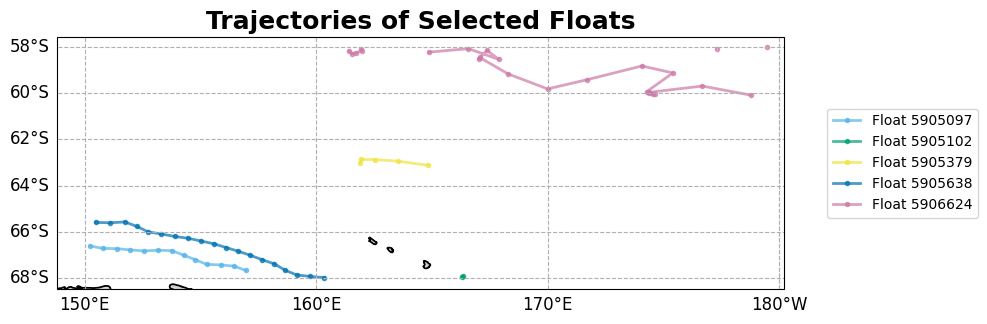

In [20]:
argo.trajectories(pressure)

In [70]:
#convert to datetime
pdf['DATE'] = pd.to_datetime(pdf['DATE'],format = 'mixed')
#subset data with good QC only
qc_flags = [1,2,8]
pdf_clean = pdf[pdf['CHLA_ADJUSTED_QC'].isin(qc_flags) & pdf['BBP700_ADJUSTED_QC'].isin(qc_flags) & pdf['DOXY_ADJUSTED_QC'].isin(qc_flags) & pdf['PSAL_ADJUSTED_QC'].isin(qc_flags)]


In [45]:
pdf_clean

,WMOID,CYCLE_NUMBER,DIRECTION,DATE,DATE_QC,LATITUDE,LONGITUDE,POSITION_QC,PRES,PRES_QC,...,NITRATE,NITRATE_QC,NITRATE_ADJUSTED,NITRATE_ADJUSTED_QC,NITRATE_ADJUSTED_ERROR,PH_IN_SITU_TOTAL,PH_IN_SITU_TOTAL_QC,PH_IN_SITU_TOTAL_ADJUSTED,PH_IN_SITU_TOTAL_ADJUSTED_QC,PH_IN_SITU_TOTAL_ADJUSTED_ERROR
7738,5905102,173,A,2022-01-06 08:34:35.000908,1,-67.905586,166.305070,8,19.730000,1.0,...,27.333750,3.0,29.457392,1.0,1.348374,26.973734,4.0,NaN,4.0,NaN
7740,5905102,173,A,2022-01-06 08:34:35.000908,1,-67.905586,166.305070,8,20.900000,1.0,...,27.408577,3.0,29.532219,1.0,1.348215,27.017559,4.0,NaN,4.0,NaN
7743,5905102,173,A,2022-01-06 08:34:35.000908,1,-67.905586,166.305070,8,24.219999,1.0,...,28.078642,3.0,30.202284,1.0,1.347743,26.941202,4.0,NaN,4.0,NaN
7746,5905102,173,A,2022-01-06 08:34:35.000908,1,-67.905586,166.305070,8,28.469999,1.0,...,28.209959,3.0,30.333601,1.0,1.347631,26.954046,4.0,NaN,4.0,NaN
7749,5905102,173,A,2022-01-06 08:34:35.000908,1,-67.905586,166.305070,8,33.580002,1.0,...,28.286922,3.0,30.410564,1.0,1.347232,27.016409,4.0,NaN,4.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67197,5906624,153,A,2022-12-21 10:15:03.000000,1,-58.108041,177.330383,1,1778.599976,1.0,...,NaN,0.0,NaN,0.0,NaN,7.867121,3.0,7.867520,1.0,0.02
67199,5906624,153,A,2022-12-21 10:15:03.000000,1,-58.108041,177.330383,1,1816.400024,1.0,...,35.927261,3.0,31.503323,1.0,1.178447,7.868339,3.0,7.868739,1.0,0.02
67202,5906624,153,A,2022-12-21 10:15:03.000000,1,-58.108041,177.330383,1,1857.199951,1.0,...,35.845238,3.0,31.421297,1.0,1.178447,7.869152,3.0,7.869552,1.0,0.02
67205,5906624,153,A,2022-12-21 10:15:03.000000,1,-58.108041,177.330383,1,1894.500000,1.0,...,NaN,0.0,NaN,0.0,NaN,7.870485,3.0,7.870885,1.0,0.02


In [148]:
pdf_WMO = pdf_clean[pdf_clean['WMOID'] == 5905638] # subsetting for one float
pdf_cycle = pdf_clean[pdf_clean['CYCLE_NUMBER'] == 1] # subsetting for one cycle

In [149]:
pdf_WMO['WMOID'].nunique() # for checking how many floats

1

In [150]:
pdf_WMO['DATE']

12764   2022-01-26 05:22:28.000568
12766   2022-01-26 05:22:28.000568
12768   2022-01-26 05:22:28.000568
12771   2022-01-26 05:22:28.000568
12774   2022-01-26 05:22:28.000568
                   ...            
23705   2022-12-12 05:05:46.000544
23706   2022-12-12 05:05:46.000544
23707   2022-12-12 05:05:46.000544
23708   2022-12-12 05:05:46.000544
23709   2022-12-12 05:05:46.000544
Name: DATE, Length: 1097, dtype: datetime64[ns]

In [151]:
pdf_WMO['DATE'] = pd.to_datetime(pdf_WMO['DATE'])

/var/folders/sr/nn_fjjln6s33md98tyfc3rd40000gn/T/ipykernel_18752/232329424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_WMO['DATE'] = pd.to_datetime(pdf_WMO['DATE'])


In [152]:
pdf_WMO['DATE'].loc[0:7769] = pd.to_datetime(pdf_WMO['DATE'])

/var/folders/sr/nn_fjjln6s33md98tyfc3rd40000gn/T/ipykernel_18752/1961562377.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pdf_WMO['DATE'].loc[0:7769] = pd.to_datetime(pdf_WMO['DATE'])
/var/folders/sr/nn_fjjln6s33md98tyfc3rd40000gn/T/ip

In [153]:
print(pdf_WMO['DATE'])

12764   2022-01-26 05:22:28.000568
12766   2022-01-26 05:22:28.000568
12768   2022-01-26 05:22:28.000568
12771   2022-01-26 05:22:28.000568
12774   2022-01-26 05:22:28.000568
                   ...            
23705   2022-12-12 05:05:46.000544
23706   2022-12-12 05:05:46.000544
23707   2022-12-12 05:05:46.000544
23708   2022-12-12 05:05:46.000544
23709   2022-12-12 05:05:46.000544
Name: DATE, Length: 1097, dtype: datetime64[ns]


In [154]:
date_nums = mdates.date2num(pdf_WMO['DATE'])
print(date_nums)

[19018.22393519 19018.22393519 19018.22393519 ... 19338.21233797
 19338.21233797 19338.21233797]


/var/folders/sr/nn_fjjln6s33md98tyfc3rd40000gn/T/ipykernel_18752/3008473619.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pdf_WMO['DATE'] = pd.to_datetime(pdf_WMO['DATE'])


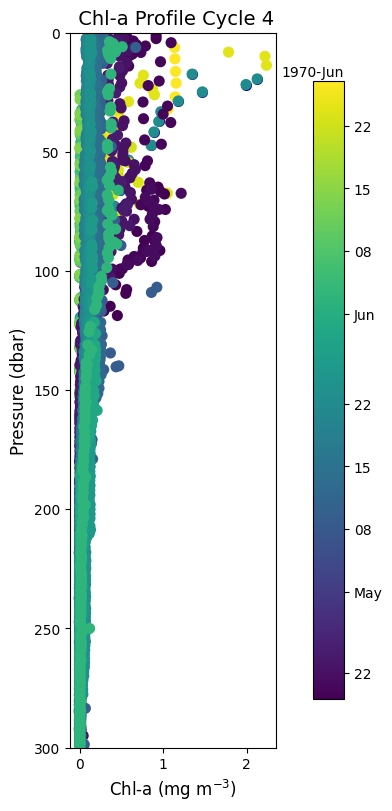

In [157]:
pdf_WMO['DATE'] = pd.to_datetime(pdf_WMO['DATE'])
date_nums = mdates.date2num(pdf_WMO['DATE'])

norm = mcolors.Normalize(vmin=date_nums.min(), vmax=date_nums.max())
cmap = plt.get_cmap('plasma', len(pdf_WMO['DATE'].unique()))


# Create figure and axis
fig = plt.figure(figsize=(10,8), layout='constrained')
ax = fig.add_subplot(141)

# pdf_date = mdates.date2num(pdf_WMO['DATE'])

for cycle, group in pdf_WMO.groupby('CYCLE_NUMBER'):
    date_val = mdates.date2num(group['DATE'].iloc[0])
    color = cmap(norm(date_val))
    ax.scatter(group['CHLA_ADJUSTED'], group['PRES_ADJUSTED'], color=color, lw=2)

ax.set_ylim(0, 300)
ax.invert_yaxis()

plot = ax.scatter(pdf_clean['CHLA_ADJUSTED'], pdf_clean['PRES_ADJUSTED'], c=pdf_clean['CYCLE_NUMBER'], lw=2)

#ax.set_xlim(0, 1.5)

ax.set_xlabel(r'Chl-a (mg m$^{-3}$)', fontsize=12)
ax.set_ylabel('Pressure (dbar)', fontsize=12)
ax.set_title(' Chl-a Profile Cycle 4', fontsize=14)


cbar = plt.colorbar(plot, ax=ax, orientation='vertical', pad=0.03)
locator = mdates.AutoDateLocator()
formatter = mdates.ConciseDateFormatter(locator)

# Apply the formatter to the y-axis of the colorbar (since it's vertical by default)
cbar.ax.yaxis.set_major_locator(locator)
cbar.ax.yaxis.set_major_formatter(formatter)

# ax = fig.add_subplot(142)
# ax.plot(pdf_clean['BBP700_ADJUSTED'], pdf_clean['PRES_ADJUSTED'], color='blue', lw=2)

# #ax.set_xlim(0, 0.02)
# ax.set_ylim(0, 300)
# ax.invert_yaxis()
# ax.set_xlabel(r'Bbp (m$^{-1}$)', fontsize=12)
# ax.set_ylabel('Pressure (dbar)', fontsize=12)
# ax.set_title(' Backscatter Profile Cycle 4', fontsize=14)


# ax = fig.add_subplot(143)
# ax.plot(pdf_clean['PSAL_ADJUSTED'], pdf_clean['PRES_ADJUSTED'], color='orange', lw=2)

# #ax.set_xlim(33, 35)
# ax.set_ylim(0, 300)
# ax.invert_yaxis()
# ax.set_xlabel(r'Bbp (m$^{-1}$)', fontsize=12)
# ax.set_ylabel('Pressure (dbar)', fontsize=12)
# ax.set_title(' Salinity Profile Cycle 4', fontsize=14)



# ax = fig.add_subplot(144)
# ax.plot(pdf_clean['DOXY_ADJUSTED'], pdf_clean['PRES_ADJUSTED'], color='purple', lw=2)

# ax.set_xlim(275, 350)
# ax.set_ylim(0, 300)
# ax.invert_yaxis()
# ax.set_xlabel(r'Bbp (m$^{-1}$)', fontsize=12)
# ax.set_ylabel('Pressure (dbar)', fontsize=12)
# ax.set_title(' Doxy Profile Cycle 4', fontsize=14)

# cbar = plt.colorbar(pdf['DATE'], ax=ax, orientation='vertical', pad=0.03)
# bar.set_label('Date', labelpad=15)